In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1 = pd.read_csv(r"C:\Users\unite\Desktop\Meerut_Village_Land_Data.csv")
df1.head()

,village,soil,total_sqft,density,price,n_city
0,Akhtyarpur,2 index,1056,2.0,39.07,2.0
1,Alamgirpur-Faridpur,4 index,2600,5.0,120.00,5.0
2,Andawali,3 index,1440,2.0,62.00,2.0
3,Aterna,3 index,1521,3.0,95.00,3.0
4,Atmadnagar Allipur,2 index,1200,2.0,51.00,2.0


In [3]:
df1.shape

(14999, 6)

In [4]:
df1.isnull().sum()

village        0
soil          18
total_sqft     0
density       85
price          0
n_city        76
dtype: int64

In [5]:
df3=df1.dropna()
df3.isnull().sum()

village       0
soil          0
total_sqft    0
density       0
price         0
n_city        0
dtype: int64

In [6]:
df3.shape

(14909, 6)

In [7]:
df3['soil_in'] = df3['soil'].apply(lambda x: int(x.split(' ')[0]))
df3.index.unique()

<ipython-input-7-a859aeaefba6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['soil_in'] = df3['soil'].apply(lambda x: int(x.split(' ')[0]))


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14989, 14990, 14991, 14992, 14993, 14994, 14995, 14996, 14997,
            14998],
           dtype='int64', length=14909)

In [8]:
df3.head()

,village,soil,total_sqft,density,price,n_city,soil_in
0,Akhtyarpur,2 index,1056,2.0,39.07,2.0,2
1,Alamgirpur-Faridpur,4 index,2600,5.0,120.00,5.0,4
2,Andawali,3 index,1440,2.0,62.00,2.0,3
3,Aterna,3 index,1521,3.0,95.00,3.0,3
4,Atmadnagar Allipur,2 index,1200,2.0,51.00,2.0,2


In [9]:
df3['soil_in'].unique()

array([ 2,  4,  3,  5,  1, 25, 43], dtype=int64)

In [10]:
df3[df3.soil_in>20]

,village,soil,total_sqft,density,price,n_city,soil_in
1718,Ukasia,25 index,8000,27.0,230.0,27.0,25
4684,Rachhoti,43 index,2400,40.0,660.0,40.0,43
14281,Machhri,25 index,8000,2.0,36.0,2.0,25


In [11]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '660 - 670', '620 - 933',
       '3450 - 3472'], dtype=object)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
 df3[~df3['total_sqft'].apply(is_float)].head()

,village,soil,total_sqft,density,price,n_city,soil_in
30,Daulatpur,4 index,2100 - 2850,4.0,186.000,4.0,4
122,Salawa,4 index,3067 - 8156,4.0,477.000,4.0,4
137,Ulakhpur,2 index,1042 - 1105,2.0,54.005,2.0,2
165,Banwaripur,2 index,1145 - 1340,2.0,43.490,2.0,2
188,Datavali Gesupur,2 index,1015 - 1540,2.0,56.800,2.0,2


In [14]:
 def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,village,soil,total_sqft,density,price,n_city,soil_in
0,Akhtyarpur,2 index,1056.0,2.0,39.07,2.0,2
1,Alamgirpur-Faridpur,4 index,2600.0,5.0,120.00,5.0,4


In [16]:
convert_sqft_to_num('2100-2800')

2450.0

In [17]:
   df4.head(4) 

,village,soil,total_sqft,density,price,n_city,soil_in
0,Akhtyarpur,2 index,1056.0,2.0,39.07,2.0,2
1,Alamgirpur-Faridpur,4 index,2600.0,5.0,120.00,5.0,4
2,Andawali,3 index,1440.0,2.0,62.00,2.0,3
3,Aterna,3 index,1521.0,3.0,95.00,3.0,3


In [18]:
df5=df4.copy()
df5['price_per_sqft' ]=df5['price']*10000 /df5['total_sqft']
df5.head(5) 

,village,soil,total_sqft,density,price,n_city,soil_in,price_per_sqft
0,Akhtyarpur,2 index,1056.0,2.0,39.07,2.0,2,369.981061
1,Alamgirpur-Faridpur,4 index,2600.0,5.0,120.00,5.0,4,461.538462
2,Andawali,3 index,1440.0,2.0,62.00,2.0,3,430.555556
3,Aterna,3 index,1521.0,3.0,95.00,3.0,3,624.589086
4,Atmadnagar Allipur,2 index,1200.0,2.0,51.00,2.0,2,425.000000


In [19]:
len(df5.village.unique())

656

In [20]:
df5.village=df5.village.apply(lambda x: x.strip()) 
village_stats=df5.groupby('village')['village'].agg('count').sort_values(ascending=False)
village_stats


village
Bahadurpur           64
Sadullapur           46
Aidalpur             46
Khanpur              46
Mirzapur             45
                     ..
Dhuma Nagli          20
Tajpura              19
Mukhtyarpur Nagla    19
Govindpuri           19
Azampur              19
Name: village, Length: 656, dtype: int64

In [21]:
village_stats_less_than_20=village_stats[village_stats<=20]
village_stats_less_than_20

village
Ulakhpur                       20
Jamalpur Khadar                20
Tofapur                        20
Tanda                          20
Rampur Sadhu Nagli             20
Ajnauli                        20
Khanwala                       20
Jaisinghpur                    20
Bhadaura                       20
Zafrabad-Durweshpur            20
Atrara                         20
Gajupura                       20
Ganeshpur                      20
Garina                         20
Gayanagla Urf Nagla Katar      20
Samaspur                       20
Gesupur Januvi                 20
Amanullapur                    20
Baram                          20
Samaspur Surani                20
Shamaspur                      20
Banwaripur                     20
Guramb                         20
Sikandarpur                    20
Aminagar Urf Bhurbaral (CT)    20
Amehra Adipur (CT)             20
Jandheri                       20
Dhuma Nagli                    20
Tajpura                        19
Mukhty

In [22]:
len(df5.village.unique())

656

In [23]:
df5.village=df5.village.apply(lambda x: 'other' if x in village_stats_less_than_20 else x)
len(df5.village.unique())

625

In [24]:
df5.head()


,village,soil,total_sqft,density,price,n_city,soil_in,price_per_sqft
0,Akhtyarpur,2 index,1056.0,2.0,39.07,2.0,2,369.981061
1,Alamgirpur-Faridpur,4 index,2600.0,5.0,120.00,5.0,4,461.538462
2,Andawali,3 index,1440.0,2.0,62.00,2.0,3,430.555556
3,Aterna,3 index,1521.0,3.0,95.00,3.0,3,624.589086
4,Atmadnagar Allipur,2 index,1200.0,2.0,51.00,2.0,2,425.000000


Now let's remove data error (where total_sqft(land)is very less and population density is high ) ("Look like city data so remove it")

In [25]:
df5[df5.total_sqft/df5.density<300].head()

,village,soil,total_sqft,density,price,n_city,soil_in,price_per_sqft
9,Baparsa,5 index,1020.0,6.0,370.0,6.0,5,3627.450980
45,Jamalpur Jalalpur,4 index,600.0,9.0,200.0,9.0,4,3333.333333
68,Khirwa Jalalpur,4 index,1350.0,7.0,85.0,7.0,4,629.629630
70,Khiwai,3 index,500.0,3.0,100.0,3.0,3,2000.000000
84,Maithna Indersingh,3 index,1499.0,5.0,102.0,5.0,3,680.453636


In [26]:
df5.shape

(14856, 8)

In [27]:
df6=df5[~(df5.total_sqft/df5.density<300)]

In [28]:
df6.shape

(14012, 8)

In [29]:
df6.price_per_sqft.describe()

count    14012.000000
mean       637.316420
std        477.715971
min         26.782981
25%        413.333333
50%        528.129613
75%        699.947183
max      18860.016764
Name: price_per_sqft, dtype: float64

 Let's now remove extream cases like [max -18860.016764]  based upon SD
 
 anything {above (mean-SD) and below (mean+SD)} we will remove

In [30]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('village'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(11341, 8)

Now we will check how does the soil fertility index 2 (and 3  property prices look like and Let's check for my village "Karnawal"

plot

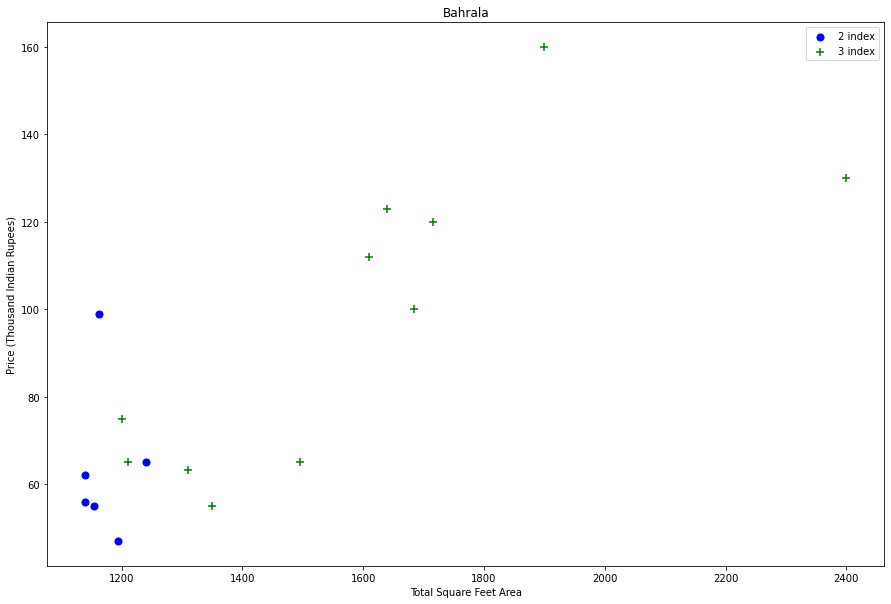

In [31]:
def plot_scatter_chart(df,village):
    index2 = df[(df.village==village) & (df.soil_in==2)]
    index3 = df[(df.village==village) & (df.soil_in==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(index2.total_sqft,index2.price,color='blue',label='2 index', s=50)
    plt.scatter(index3.total_sqft,index3.price,marker='+', color='green',label='3 index', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Thousand Indian Rupees)")
    plt.title(village)
    plt.legend()
    
plot_scatter_chart(df7,"Bahrala")

We should also remove properties where for same Village, the price of (for example) 3 index soil land (means more fertile) is less than 2 index soil land (means less fertile than 3 index) with same square ft area. What we will do is for a given location, we will build a dictionary of stats per index, i.e. { '1' : { 'mean' : 4000, 'std : 2000, 'count': 34 }, '2' : { 'mean' : 4300, 'std : 2300, 'count': 22 },
}

In [32]:
def remove_vill_outliers(df):
    exclude_indices = np.array([])
    for village, village_df in df.groupby('village'):
        vill_stats = {}
        for vill, vill_df in village_df.groupby('soil_in'):
            vill_stats[vill] = {
                'mean': np.mean(vill_df.price_per_sqft),
                'std': np.std(vill_df.price_per_sqft),
                'count': vill_df.shape[0]
            }
        for bhk, vill_df in village_df.groupby('soil_in'):
            stats = vill_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, vill_df[vill_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [33]:
df8 = remove_vill_outliers(df7)
# df8 = df7.copy()
df8.shape

(9489, 8)

Text(0, 0.5, 'Count')

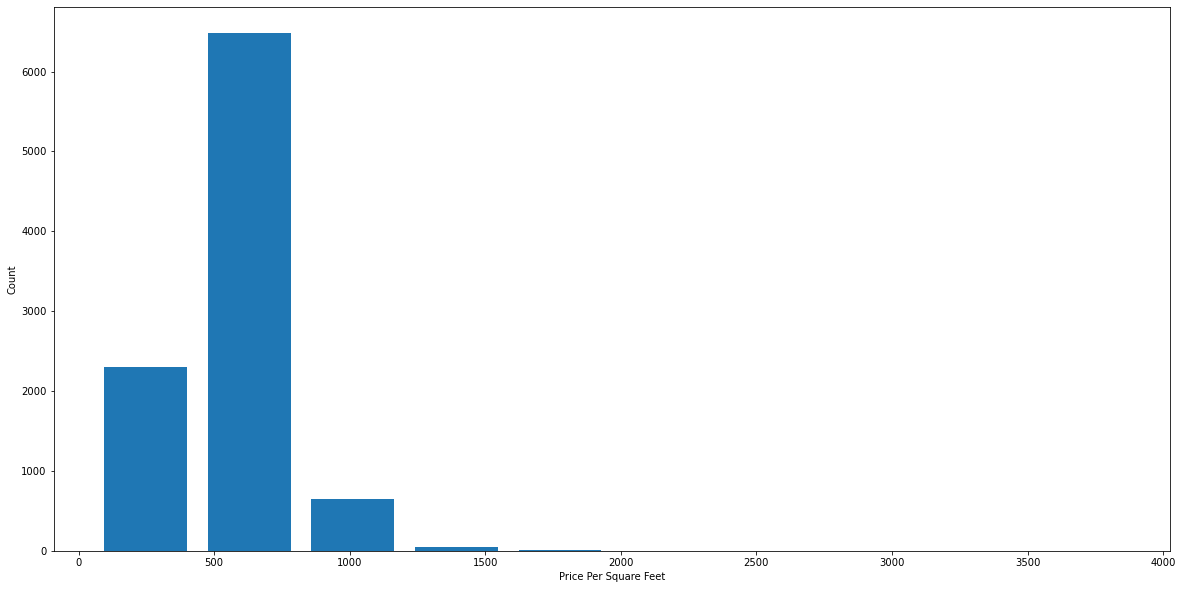

In [34]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [35]:
df8.n_city.unique()

array([ 2.,  1.,  5.,  4.,  3.,  6., 13.,  7., 12., 14.,  8.,  9., 16.])

In [36]:
df8[df8.n_city>10]

,village,soil,total_sqft,density,price,n_city,soil_in,price_per_sqft
345,Alamgirpur-Faridpur,2 index,1552.0,2.0,75.97,13.0,2,489.497423
394,Alipur Morna,2 index,12000.0,10.0,525.00,12.0,2,437.500000
873,Baghpur,3 index,3300.0,10.0,500.00,14.0,3,1515.151515
2397,Daulatpur Urf Mamipur,1 index,5425.0,10.0,275.00,13.0,1,506.912442
3720,Jalalpur,1 index,10000.0,10.0,550.00,16.0,1,550.000000
4126,Jharaka,2 index,4000.0,10.0,160.00,12.0,2,400.000000


nearest city=n_city*10 : so it quite impossible if not having nearest city in 100 km of area so I will remove all n_city data point  having nearest city >100km

Text(0, 0.5, 'Count')

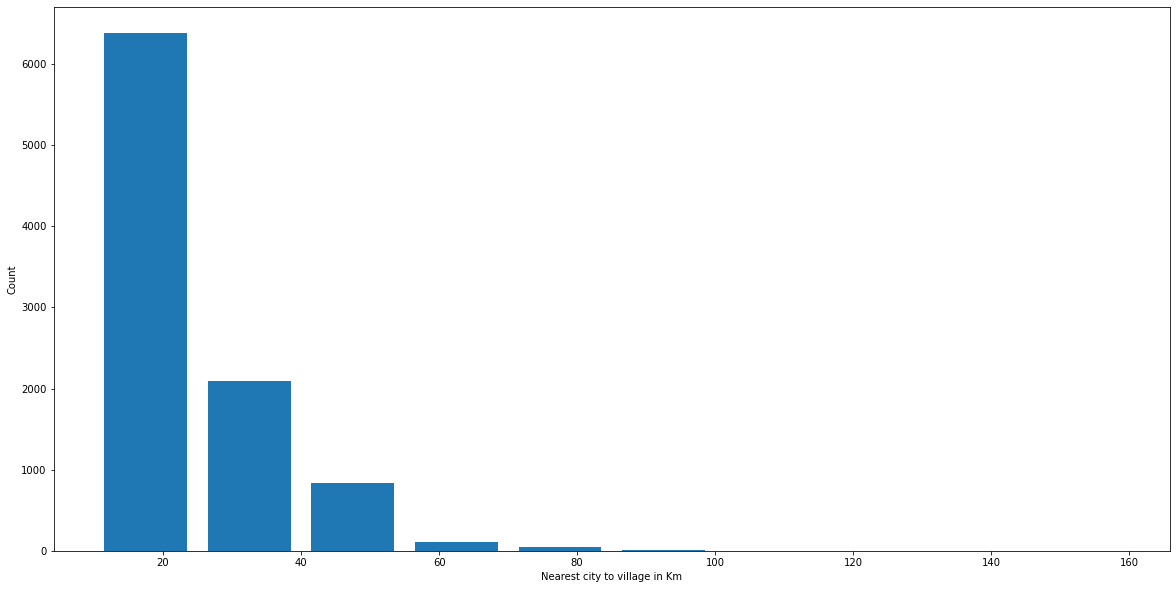

In [37]:
plt.hist(df8.n_city*10,rwidth=0.8)
plt.xlabel("Nearest city to village in Km")
plt.ylabel("Count")

In [38]:
  df8[df8.n_city>df8.soil_in+2]

,village,soil,total_sqft,density,price,n_city,soil_in,price_per_sqft
345,Alamgirpur-Faridpur,2 index,1552.0,2.0,75.970,13.0,2,489.497423
394,Alipur Morna,2 index,12000.0,10.0,525.000,12.0,2,437.500000
595,Asilpur,2 index,1296.0,2.0,44.000,6.0,2,339.506173
873,Baghpur,3 index,3300.0,10.0,500.000,14.0,3,1515.151515
939,Bahadurpur,2 index,1205.0,2.0,57.500,8.0,2,477.178423
1029,Bahsuma (NP),3 index,2400.0,6.0,270.000,6.0,3,1125.000000
1458,Bhagwanpur Bangar,5 index,4000.0,8.0,150.000,8.0,5,375.000000
1725,Bhojpur,2 index,432.0,1.0,19.500,5.0,2,451.388889
2203,Dabathuwa,2 index,1181.0,3.0,47.570,6.0,2,402.794242
2218,Dabathuwa Garhi,2 index,1070.0,2.0,42.000,6.0,2,392.523364


In [39]:
len(df8.n_city>10)

9489

In [40]:
len(df8[df8.n_city>10])

6

Outlier remover : I will remove all the village data whose distance from the city is more than 10

In [41]:
df9=df8[df8.n_city<7]

In [42]:
df9.shape

(9426, 8)

In [43]:
df10 = df9.drop(['soil','price_per_sqft'],axis='columns')
df10.head(4)

,village,total_sqft,density,price,n_city,soil_in
0,Achikalan,930.0,2.0,39.00,2.0,2
2,Achikalan,1089.0,2.0,43.55,2.0,2
3,Achikalan,989.0,2.0,60.00,2.0,2
4,Achikalan,1150.0,2.0,38.00,2.0,2


In [44]:
pd.get_dummies(df10.village)

,Achikalan,Afjalpur Urf Raninagla,Afzalpur Pawati,Agwanpur,Ahara,Ahmadnagar Badhla,Ahmadpur Urf Dandoopur,Ahmadpuri Urf Amanpuri,Aidalpur,Ajrara,...,Timakia,Ukasia,Ukhleena,Uldeypur,Uldhan,Uplehra,Veerkhera,Walidpur,Yusufabad,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Let's Train our data from here: Model Building

In [45]:
dummies=pd.get_dummies(df10.village)
dummies.head(3)

,Achikalan,Afjalpur Urf Raninagla,Afzalpur Pawati,Agwanpur,Ahara,Ahmadnagar Badhla,Ahmadpur Urf Dandoopur,Ahmadpuri Urf Amanpuri,Aidalpur,Ajrara,...,Timakia,Ukasia,Ukhleena,Uldeypur,Uldhan,Uplehra,Veerkhera,Walidpur,Yusufabad,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df11=pd.concat([df10,dummies],axis='columns')

to avoid a dummy variable trap, we should have one dummies less column so let's 1st remove first column to represnt this column we can use 0 in another column and let them know we already drop

In [47]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [48]:
df11.head(3)

,village,total_sqft,density,price,n_city,soil_in,Achikalan,Afjalpur Urf Raninagla,Afzalpur Pawati,Agwanpur,...,Tikri,Timakia,Ukasia,Ukhleena,Uldeypur,Uldhan,Uplehra,Veerkhera,Walidpur,Yusufabad
0,Achikalan,930.0,2.0,39.00,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Achikalan,1089.0,2.0,43.55,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Achikalan,989.0,2.0,60.00,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


lets now drop the village name 

In [49]:
df12=df11.drop('village',axis='columns')
df12.head(2)

,total_sqft,density,price,n_city,soil_in,Achikalan,Afjalpur Urf Raninagla,Afzalpur Pawati,Agwanpur,Ahara,...,Tikri,Timakia,Ukasia,Ukhleena,Uldeypur,Uldhan,Uplehra,Veerkhera,Walidpur,Yusufabad
0,930.0,2.0,39.00,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1089.0,2.0,43.55,2.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df12.shape

(9426, 629)

In [51]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,density,n_city,soil_in,Achikalan,Afjalpur Urf Raninagla,Afzalpur Pawati,Agwanpur,Ahara,Ahmadnagar Badhla,...,Tikri,Timakia,Ukasia,Ukhleena,Uldeypur,Uldhan,Uplehra,Veerkhera,Walidpur,Yusufabad
0,930.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1089.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,989.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1150.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,708.0,1.0,1.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y=df12.price
y.head()

0    39.00
2    43.55
3    60.00
4    38.00
5    28.32
Name: price, dtype: float64

lets divide our dataset into traing and testing dataset so that we use training dataset to train our model and to evaulate the model performance we use test dataset  

let import train test split method from sklearn 

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

here test size=0.2 mean I want 20% of my sample to be test sample and remaning 80% for model training   

lets now create a linear regression model  and call fit method on x_train and y_train and once the model is train next step to evaulte the score 

In [54]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7695815659191456

76% pretty goood, so now first used k fold cross validation method

In [55]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.7575627 , 0.7367095 , 0.36582259, 0.74166579, 0.70910427])

shuffle split will randomie my sample so that each of the fold have equal distb. of my datasample

lets try other regressiion algortihm to make our score more than 80% so that one of them will give me best score  so lets use method grid  search CV (best API in sklearn which can run our model on different regression and parameter and tell us the best score using find_best_model_using_gridsearchcv function

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



Based on above results we can say that decision_tree gives the best score. Hence we will use that.

In [57]:
def predict_price(village,sqft,density,soil_in):    
    loc_index = np.where(X.columns==village)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = density
    x[2] = soil_in
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]


In [58]:
X.columns

Index(['total_sqft', 'density', 'n_city', 'soil_in', 'Achikalan',
       'Afjalpur Urf Raninagla', 'Afzalpur Pawati', 'Agwanpur', 'Ahara',
       'Ahmadnagar Badhla',
       ...
       'Tikri', 'Timakia', 'Ukasia', 'Ukhleena', 'Uldeypur', 'Uldhan',
       'Uplehra', 'Veerkhera', 'Walidpur', 'Yusufabad'],
      dtype='object', length=628)

In [59]:
predict_price('Karnawal Rural',1000, 2, 2)

53.134176958370375

53 thousand for 1 year is estimted price for land cultivation

In [60]:
predict_price('Karnawal Rural',1000, 3, 3)

66.19630558491237

In [61]:
predict_price('Karnawal Rural',1000, 4, 4)

79.25843421145434

In [62]:
predict_price('Karnawal Rural',1000, 5, 5)

92.32056283799632

we can clearly see when we increase fertile index and population desnity index price increase so our model is correct 

lets import this model to a pickle file and then it will be used it in our python flask server 

In [63]:
import pickle
with open('agriculture_land_price_prediction_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

Export location and column information to a file that will be useful later on in our prediction application

In [64]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

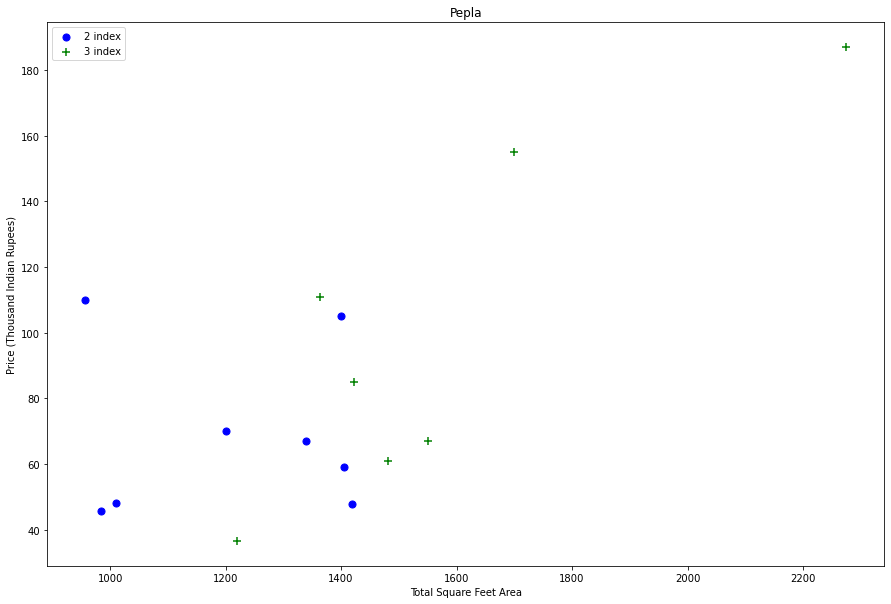

In [65]:
plot_scatter_chart(df7,"Pepla")